In [109]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

In [110]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [111]:
train_data.shape

(404, 13)

In [112]:
train_labels.shape

(404,)

In [113]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [114]:
train_labels[0]

15.2

In [115]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data/std

test_data = test_data - mean
test_data = test_data / std

In [116]:
def build_model_regression(lr_var, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = optimizers.RMSprop(learning_rate=lr_var), loss='mse', metrics=['mae'])
  return model

In [117]:
k = 4
num_val_sample = len(train_data) // k
num_epoch = 85
all_history = []

In [118]:
valor = 2
(valor) * num_val_sample

202

In [119]:
for i in range(k):
  print("Fold:", i)
  val_data = train_data[i*num_val_sample : (i+1)*num_val_sample]
  val_targets = train_labels[i*num_val_sample : (i+1)*num_val_sample]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_sample],
       train_data[(i+1)*num_val_sample:]
       ],
      axis=0)

  partial_train_targets = np.concatenate(
      [train_labels[:i*num_val_sample],
       train_labels[(i+1)*num_val_sample:]
       ],
      axis=0)

  model = build_model_regression(0.001, 13)
  history = model.fit(partial_train_data, partial_train_targets,
                      epochs=num_epoch,
                      batch_size= 16,
                      validation_data=(val_data,val_targets),
                      verbose=0
                      )
  all_history.append(history.history['val_mae'])

Fold: 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold: 1
Fold: 2
Fold: 3


In [120]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [121]:
all_mae_avg

,0
0,19.303360
1,15.630777
2,11.152199
3,7.608082
4,5.676619
...,...
80,2.356870
81,2.343026
82,2.291224
83,2.297396


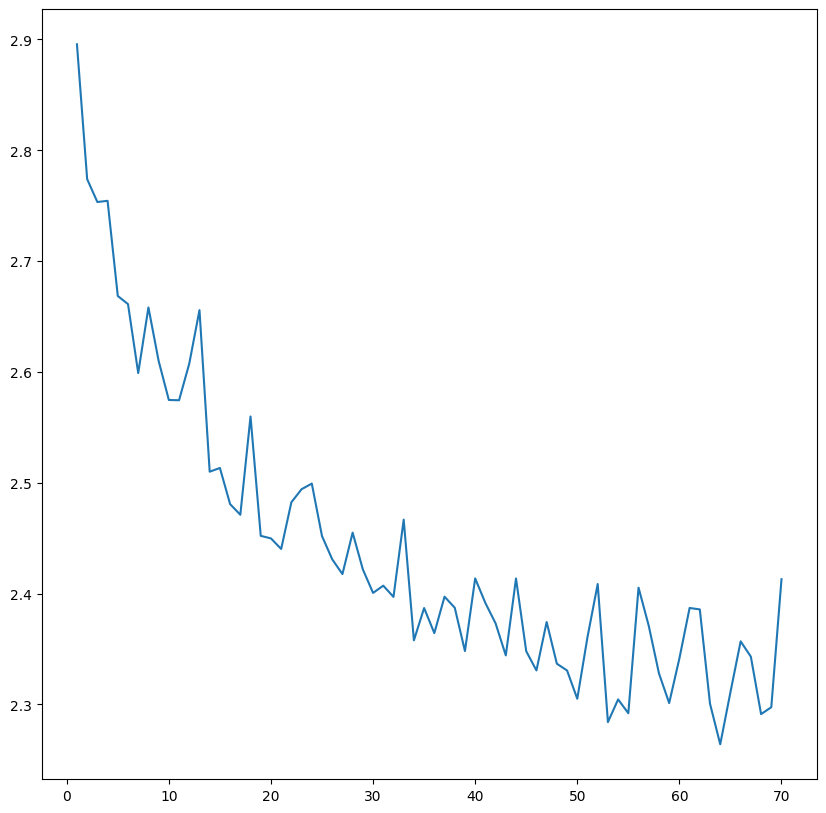

In [122]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1, len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [125]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2079 - mae: 2.5712


[21.777963638305664, 2.806154251098633]